<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/ESAA_5_26(87~95%2C105~115).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 모델 세부 설정

In [2]:
import tensorflow as tf
# keras innerdataset > mnist load
mnist = tf.keras.datasets.mnist

# load_data> data load
(x_train, y_train),(x_test, y_test)=mnist.load_data()

# check loaded dataset
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

# normalize dta
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


# 4-1 초기값 설정
glorot uniform 초기화방법을 설정하여 초기화방법을 다르게 설정한다.

In [3]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

기본값으로 설정된 glorotuniform 초기화방법을 henormal로 변경하기 ㅜ이해서 kernel initializer 매개변수에 설정한다. 손실함수와 동일하게 문자열 지정과 클래스 인스턴스 지정 모두 가능하다.

In [4]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# class instance 초기화
he_normal = tf.keras.initializers.HeNormal()
print(dense.get_config()['kernel_initializer'])


{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


케라ㅅ에서 지원하는 자주 사용되는 초기화목록은
글로릿초기화, yann leccun 초기화, he 초기화, 정규분포, 연속균등 분포 초기화가 있다.

# 4-2 규제
모델의 과대적합 해소를 위해 l1, l2 규제를 적용하기도 한다. 기본값은 규제 없음이기 때문에 별도로 적용해야 한다.

In [5]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_2',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

모델의 과대적합 방지를 위해 모델을 구성하는레이어마다 규제를 적용할 수 있다. 케라스에서 지원하는 규제는 l1, l2규제이다.

In [6]:
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

regularizer = tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


# 4-3 드롭 아웃
딥러닝 모델의 층이 넓고 깊어지는 모델은 과대적합 문제를 일으키기 쉬운데 확률적으로 몇개의 신호를 끊는 드롭아웃을 적용하게 되면 모델이 쉽게 과대적합되는 것을 방지할 수 있다.
모델이 학습하는 가중치파라미터의 개수가 현저히 감소하기 때문이다. 
중요한 점은 모델이 훈련할 때는 드롭아웃이 적용되지만 예측시에는 모든 노드들이 활용된다.

In [7]:
# 25% dropout 적용
tf.keras.layers.Dropout(0.25)

# 4-4 배치정규화
각 층에서 활성화함수를 통과하기 전 미니배치의 스케일을 정규화한다. 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있다.

배치 정규화층은 케라스에서 클래스 함수로 지원하기 때문에 코드를 구현할 필요 없다. model a에서 배치정규화를 적용한 모델을 model b로 지정하여 성능을 비교하자.

In [8]:
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

배치 정규화만 추가하였는데 손실이 안정적으로 빠르게 수렴한다. 데이터 개수가 적은 mnist 손글씨 데이터셋에서는 큰 차이가 없을 수 있으나 더 크고 복잡한 데이터셋에 대해서는 정규화 유무가 성능에 크게 영향을 미치는 경우도 있다.

# 4-5 활성화 함수
이번에는 다른 활성화함수를 적용해보자. 클래스 인스턴스로 선언하여 하이퍼파라미터를 변경하여 적용할 수 있다.

In [13]:
tf.keras.layers.LeakyReLU()

tf.keras.layers.LeakyReLU(alpha=0.2)

In [16]:
# apply model
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    #batch normalization
    tf.keras.layers.BatchNormalization(),
    #leakyRELU
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

앞에서 생성한 두개의 모델과 렐루 활성화 함수로 변경한 모델까지 세가지의 10번 에폭 훈련 후 수렴속도를 확인한다.


In [17]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_a = model_a.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)
history_b = model_b.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)
history_c = model_c.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2931 - accuracy: 0.9163 - val_loss: 0.1538 - val_accuracy: 0.9518
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1333 - accuracy: 0.9603 - val_loss: 0.1134 - val_accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0975 - accuracy: 0.9711 - val_loss: 0.1084 - val_accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.1144 - val_accuracy: 0.9670
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0640 - accuracy: 0.9809 - val_loss: 0.0910 - val_accuracy: 0.9739
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0947 - val_accuracy: 0.9734
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.1010 - val_accuracy

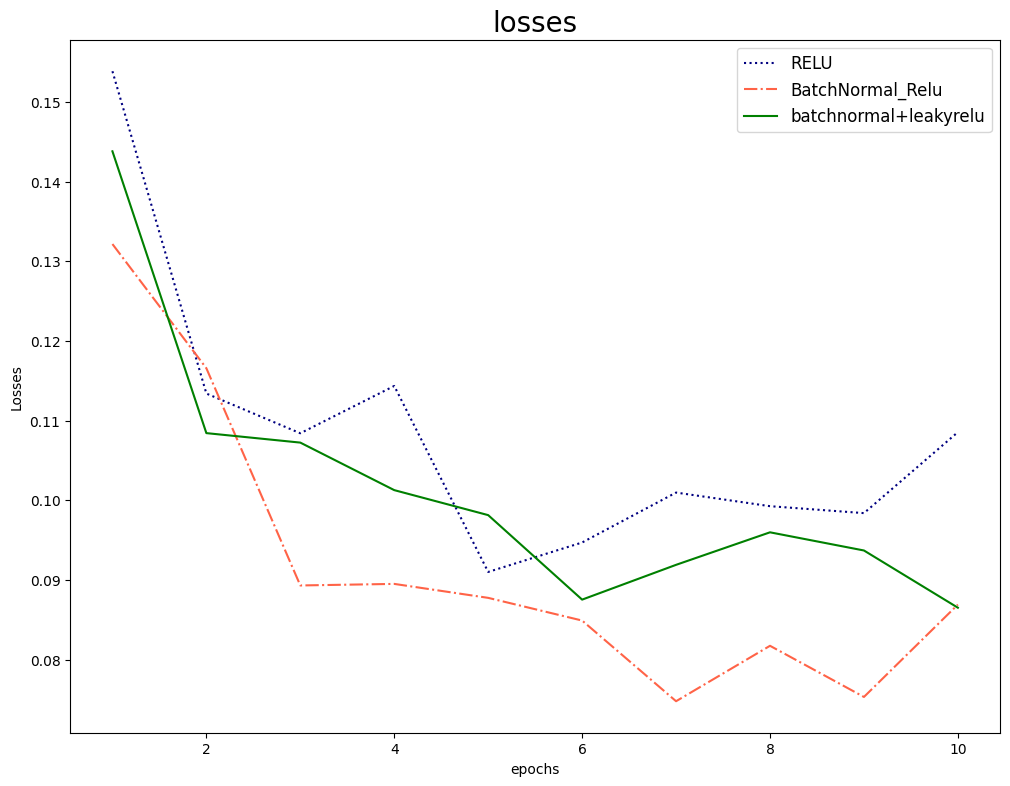

In [21]:
# visualize result
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle='dotted')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['RELU','BatchNormal_Relu','batchnormal+leakyrelu'], fontsize=12)
plt.show()

mnist데이터셋은 모델별 차이가 크진 않으나 복잡한 데이터셋에서는 훈련추이를 다르게 볼 수 있다.

# 06 모델 저장 및 불러오기
예제 실습을 위해 mnist 데이터셋을 불러오고 신경망 모델을 활용하여 모델훈령르 먼저 완료한다

## 6-1 모델을 파일로 저장
훈련을 종료하여 가중치가 업데이트 된 모델 인스턴스를 저장할 수 있다. save 메소드를 사용하는데, save메소드를 호출할 때 저장할 파일의 디렉토리를 포함하는 파일명을 ㅐ매개변수로 지정한다. 모델을 저장하는 형식은 hdf5 포맷과 save model 두가지가 있따.

모델을 저장할 파일명이 h5 확장자를 포함하는 경우는 이 포멧으로 저장한다. 이는 대용량의 데이터를 저장하기 위한 파일 형식이다.

In [23]:
model_a.save('h5-model.h5')

## 5-2 저장된 모델 복원

In [24]:
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


복원한 모델을 검증하여 복원이 잘 되어있는지 확인한다.evaluate 함수에 대입해 손실 함수와 평가지표를 계산한다.

In [27]:
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss:{loss:5f}, acc:{acc:5f}')


h5 model] loss:0.108558, acc:0.972400


h5 확장자 생략시 savedmodle 포맷으로 저장되며 이 포맷으로 저장되도 복원시 hdf5와 동일하게 하면 된다.

In [28]:
model_a.save('saved-model')

In [29]:
# check summary
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [30]:
# same ability as hdf5
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:5f}, acc:{acc:5f}')

# evaluate model
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:5f}, acc:{acc:5f}')


h5 model] loss: 0.108558, acc:0.972400
saved_model] loss: 0.108558, acc:0.972400


# 07 복잡한 모델 생성
## 7-1 함수형 APO
함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다. 입력 매개변수를 여러개 갖는 다중입력, 다중출력, 같은 레벨에 여러 층을 ㅐㅂ치하여 입력과 출력을 공유하는 구조도 가능하다

한편 sequential 은 단방향만 허용하는 것으로, 특정 레이어를 건너뛰거나 병합 분리하는 등의 구조 모델을 구현할 수 없다.

기존 sequential mnist 분류기를 함수형 api로 다시 구현해보자

함수형 api를 사용하기 위해서는 먼저 input 레이어를 정의하고 shape을정의한다. 레이어마다 반환되는 출력값을 변수에 저장한 뒤 다음 레이어의 입력을 연결한다. 이렇게 여러 레이어를 체인구조로 입출력을 연결한다.

In [31]:
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)


레이어마다 name 매개변수로 이름을 부여한 것은 summary에서 ㅎ함께 ㅜㅊㄹ력된다 이렇게 연결된 후 tf,keras,model()에 입력레이어와 출력 레이어를 정의해 모델을 생성한다.

In [36]:
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


tf kears model에 input 매개변수로 입력층 이름을, Ouput매개변수에 마지막애를 생성하고 모델 인스턴스 생성시 name 매개변수에 이름을 지정하면 summary에 이름이 출력된다.

summary로 구조시각화가 어려운 모델의 경우 케라스 유틸패키지의 plot model을 이용한다

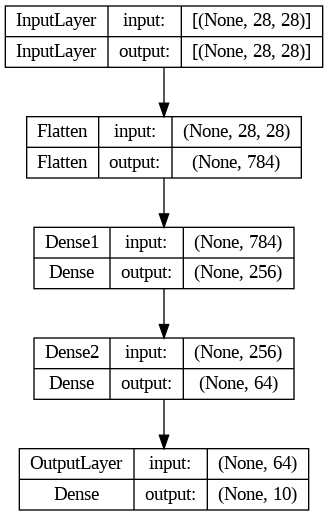

In [39]:
from tensorflow.keras.utils import plot_model

plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

모양을 보여줄지 층 이름을 보여줄지 여부를 선택 가능하며 이미지 파일로 저장할 수 있다.

함수형 api로 생성한 모델도 시퀀셜과 동일하게 훈련할 수 있다. 컴파일하고 fit으로 훈련한다. evaluate로 검증할 수 잇다.

In [41]:
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

func_model.fit(x_train, y_train, epochs=3)

loss, acc= func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:5f}, acc: {acc:5f}')


Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2104 - accuracy: 0.9371
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0878 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0593 - accuracy: 0.9811
Functional Model] loss: 0.080225, acc: 0.975400


## 7-2 모델 서브클래싱

모델 클래스를 제공하고 이를 기반으로 딥러닝 모델을 구현한다. 상속받아 서브클래스로 딥러닝 모델을 생성할 수도 있다.

tf.keras.model을 상속받아 모델 클래스를 구현한다. init 함수에 레이어를 정의하고 레이어의 하아피파라미터를 정의한다

In [49]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

  #method overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

콜 함수를 메소드 오버라이딩으로 구현한다. call은 fit이 호출되어 훈련하는 경우 호출되는 함수로 내부에서 모델의입력부터 출력까지의 흐름, 순전파를 정의하고 함ㅅ형 api와 같은 방식ㅇ로 모든 레이어를 체인처럼 연결한다. 마지막으로 최종 출력값을 return한다


In [52]:
mymodel = MyModel()
mymodel._name='subclass_model'
mymodel(tf.keras.layers.Input(shape=(28, 28)))
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         multiple                  0         
                                                                 
 dense_24 (Dense)            multiple                  200960    
                                                                 
 dense_25 (Dense)            multiple                  16448     
                                                                 
 dense_26 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


tfkeras model을 상속받아 구현한 모델인 마이모데을 생성자로 인스턴스를 생성한다. 모델에 이름을 부여하고 싶다면 모델의 인스턴스의 name에 이름을 지정한다. 생성자로 객체를 새엇ㅇ해 저장한 마이모ㅓ델 변수에 바로 서머리로 요약 출력하는 것은 어렵다. input shape이 정의되지 않았기때문에 전체모델의 구조를 생서하지 못하기 때문이다. mymodel의 input레이어와 함께 shape을 정의해주면 summary로 모델의 요약을 확인할 수 있다.

In [56]:
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mymodel.fit(x_train, y_train, epochs=3)
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'subclassing model] loss:{loss:5f}, acc:{acc:5f}')

Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 0.0492 - accuracy: 0.9840
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0351 - accuracy: 0.9884
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284 - accuracy: 0.9907
subclassing model] loss:0.068066, acc:0.981500


모델 서브클래싱으로 생성된 모델의 훈련도 동일하게 컴파일 후 핏으로 훈련한다. 물론 평가메소도를 성능검증도 가능하나 모델 생성 방식에 차이가 있을 뿐이다.

## 7-3 서브클래싱 모델 파라미터를 활용한 생성

생성자 파라미터로 모델내부 하이퍼파라미터를 지정할 ㅜ수 있다. 다음은 모데의 생성자파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화하는 예제이다.

In [58]:
class Mymodel(tf.keras.Model):
  def __init__(self, units, num_classes):
    super(Mymodel, self).__init__()
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  def call(self,x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [59]:
mymodel = Mymodel(256,10)
mymodel(tf.keras.layers.Input(shape=(28,28)))
mymodel.summary()

Model: "mymodel_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         multiple                  0         
                                                                 
 dense_27 (Dense)            multiple                  200960    
                                                                 
 dense_28 (Dense)            multiple                  16448     
                                                                 
 dense_29 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [61]:
# 생성자 파라미터로 초기화하여 생성한 모델에 summary로 요약한 결과를 확인
# 동적으로 설정한 레이어의 파라미터가 초기화되었음을 확인 가능
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mymodel.fit(x_train, y_train, epochs=3)
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'subclassing model w.parameters] loss: {loss:5f}, acc:{acc:5f}')

Epoch 1/3
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2164 - accuracy: 0.9355
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0878 - accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0608 - accuracy: 0.9804
subclassing model w.parameters] loss: 0.082133, acc:0.973700


동일하게 컴파일 메소드로 컴파일 후 핏으로 훈련하면 성능검증이 가능하다.